# Import des bibliothèques

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np

from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, cross_val_score

from category_encoders import TargetEncoder

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import pandas as pd
from meteostat import Daily, Point

# Import des fichiers

In [ ]:
X0 = pd.read_csv("x_train_final.csv")
y0 =  pd.read_csv("y_train_final_j5KGWWK.csv")
X_soumission0 = pd.read_csv("x_test_final.csv")

In [ ]:
X=X0.copy()
y=y0.copy()
X_soumission= X_soumission0.copy()

# Préparation des données

## Visualisation des données

In [ ]:
X.head(5)

,Unnamed: 0.1,Unnamed: 0,train,gare,date,arret,p2q0,p3q0,p4q0,p0q2,p0q3,p0q4
0,0,0,VBXNMF,KYF,2023-04-03,8,0.0,0.0,1.0,-3.0,-1.0,-2.0
1,1,1,VBXNMF,JLR,2023-04-03,9,0.0,0.0,0.0,1.0,0.0,1.0
2,2,2,VBXNMF,EOH,2023-04-03,10,-1.0,0.0,0.0,-1.0,0.0,0.0
3,3,3,VBXNMF,VXY,2023-04-03,11,-1.0,-1.0,0.0,2.0,-2.0,0.0
4,4,4,VBXNMF,OCB,2023-04-03,12,-1.0,-1.0,-1.0,-1.0,3.0,2.0


In [ ]:
X[['arret', 'p2q0', 'p3q0', 'p4q0', 'p0q2', 'p0q3', 'p0q4']].describe()

,arret,p2q0,p3q0,p4q0,p0q2,p0q3,p0q4
count,667264.000000,667264.000000,667264.000000,667264.000000,667264.000000,667264.000000,667264.000000
mean,18.277499,-0.170696,-0.167304,-0.176308,-0.163223,-0.173579,-0.174436
std,7.030424,1.976521,1.960416,1.926275,1.988527,2.643148,4.732999
min,7.000000,-160.000000,-160.000000,-160.000000,-160.000000,-1441.000000,-1441.000000
25%,12.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,42.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



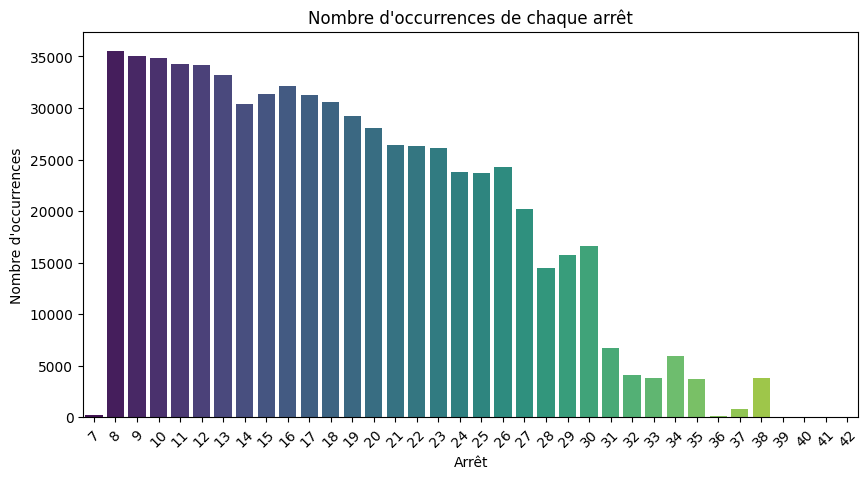

In [ ]:
compte_arret = X["arret"].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=compte_arret.index, y=compte_arret.values, palette="viridis")


plt.xlabel("Arrêt")
plt.ylabel("Nombre d'occurrences")
plt.title("Nombre d'occurrences de chaque arrêt")
plt.xticks(rotation=45)


plt.show()

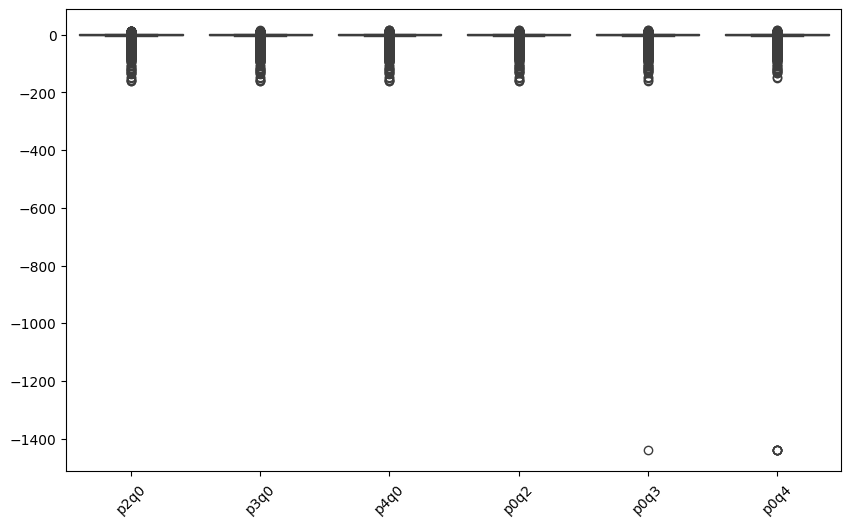

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=X[['p2q0', 'p3q0', 'p4q0', 'p0q2', 'p0q3', 'p0q4']])
plt.xticks(rotation=45)
plt.show()

## Nettoyage des données

In [ ]:
X.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
train,0
gare,0
date,0
arret,0
p2q0,0
p3q0,0
p4q0,0
p0q2,0


Il n'y a donc aucune valeur manquante.

In [ ]:
colonnes =['p2q0','p3q0','p4q0','p0q2','p0q3','p0q4']
X = X[(X[colonnes] >= -1000).all(axis=1)]

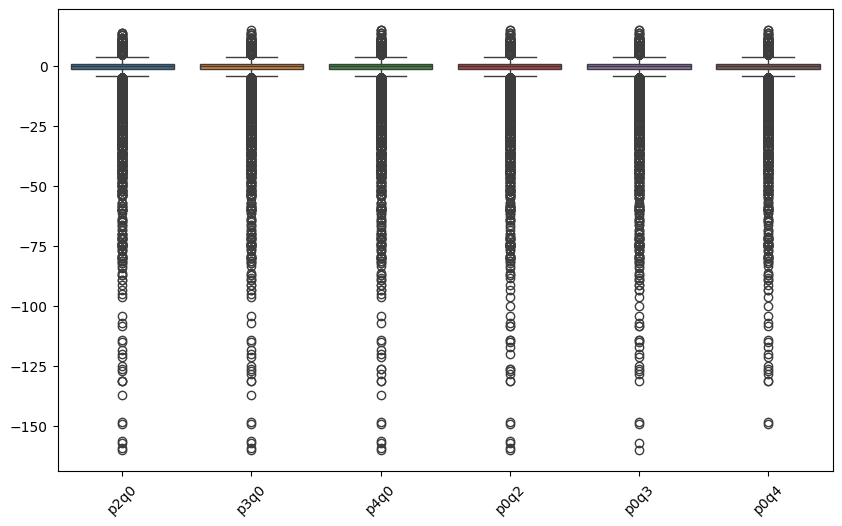

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=X[['p2q0', 'p3q0', 'p4q0', 'p0q2', 'p0q3', 'p0q4']])
plt.xticks(rotation=45)
plt.show()

In [ ]:
count_values = (X[colonnes] < -60).sum().sum()

# Nombre total de valeurs dans le DataFrame
total_values = X[colonnes].size

# Ratio
ratio = count_values / total_values

print(f"Nombre de valeurs inférieures à -60 : {count_values}")
print(f"Nombre total de valeurs : {total_values}")
print(f"Ratio des valeurs inférieures à -60 : {ratio:.2%}")

Nombre de valeurs inférieures à -60 : 496
Nombre total de valeurs : 4003542
Ratio des valeurs inférieures à -60 : 0.01%


In [ ]:
X = X[(X[colonnes] >= -150).all(axis=1)]
y = y.loc[X.index]

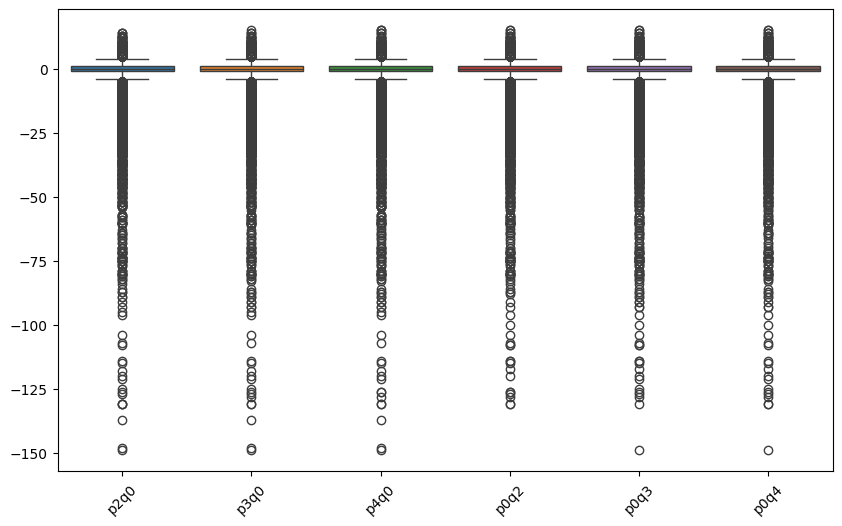

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=X[['p2q0', 'p3q0', 'p4q0', 'p0q2', 'p0q3', 'p0q4']])
plt.xticks(rotation=45)
plt.show()

In [ ]:
X.drop(['Unnamed: 0.1','Unnamed: 0','train'],axis=1, inplace = True)
X_soumission.drop(['Unnamed: 0','train'],axis=1, inplace = True)
y.drop(['Unnamed: 0'],axis=1, inplace = True)

## Encodage

In [ ]:
import datetime

if 'date' in X.columns:
    X['date'] = X['date'].apply(
        lambda date_str: (
            datetime.datetime.strptime(str(date_str), '%Y-%m-%d')
            .date()
            .isoweekday() + 6
        ) % 7 + 1
    )

import datetime

if 'date' in X_soumission.columns:
    X_soumission['date'] = X_soumission['date'].apply(
        lambda date_str: (
            datetime.datetime.strptime(str(date_str), '%Y-%m-%d')
            .date()
            .isoweekday() + 6
        ) % 7 + 1
    )

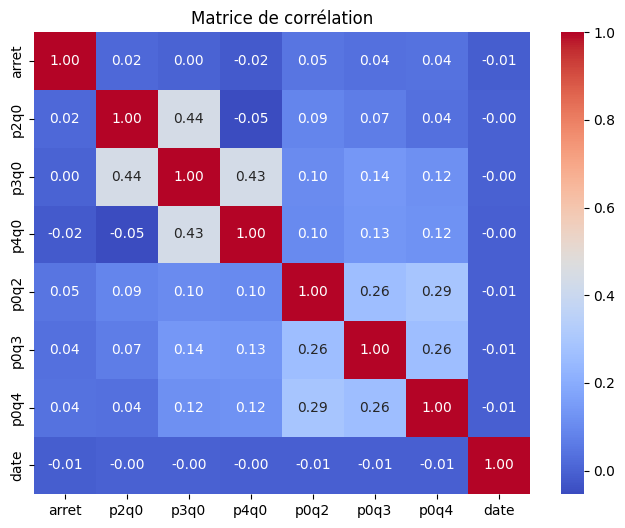

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(X[['arret', 'p2q0', 'p3q0', 'p4q0', 'p0q2', 'p0q3', 'p0q4','date']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

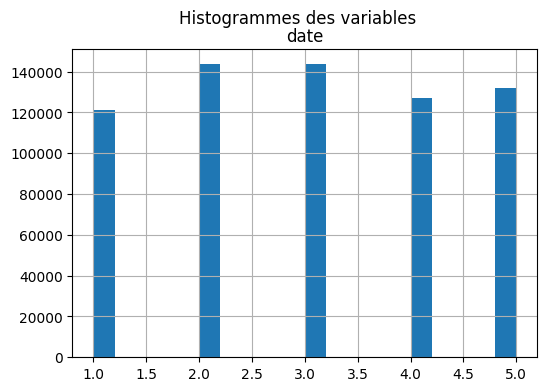

In [ ]:
X[['date']].hist(figsize=(6, 4), bins=20)
plt.suptitle("Histogrammes des variables")
plt.show()

Les weekends ne sont donc pas inclus

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=1)

A l'aide de *TargetEncoding*, on encode la feature *gare*.





In [ ]:
encoder = TargetEncoder(cols=['gare'])

X_train['gare'] = encoder.fit_transform(X_train[['gare']],y_train['p0q0'])
X_test['gare'] = encoder.transform(X_test[['gare']])
X_soumission['gare'] = encoder.transform(X_soumission[['gare']])
X_soumission['gare'] = X_soumission['gare'].astype(float)

On modifie le format de la date afin d'avoir uniquement le jour de la semaine .

# Modèles

In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Lasso

In [ ]:
model_lasso = Lasso()

In [ ]:
model_lasso.fit(X_train_scaled, y_train)

predict_lasso = model_lasso.predict(X_test_scaled)

mea_lasso = mean_absolute_error(y_test, predict_lasso)
print(f"La MEA calculée est de : ", mea_lasso)

La MEA calculée est de :  0.9563321229295301


## Ridge

In [ ]:
model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)

predict_ridge = model_ridge.predict(X_test_scaled)

mea_ridge = mean_absolute_error(y_test, predict_ridge)
print(f"La MEA calculée est de : ", mea_ridge)

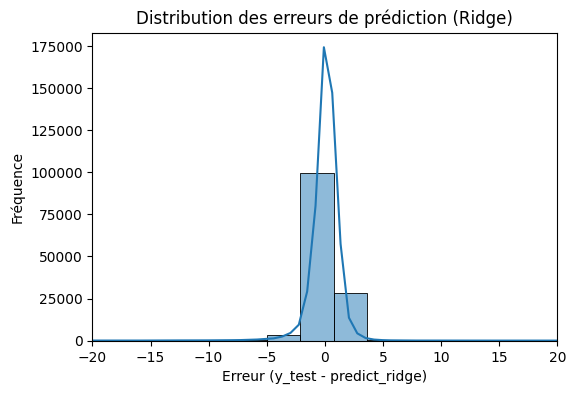

In [ ]:
errors = np.array(y_test).flatten() - np.array(predict_ridge).flatten()

plt.figure(figsize=(6, 4))
sns.histplot(errors, bins=50, kde=True)
plt.xlabel("Erreur (y_test - predict_ridge)")
plt.ylabel("Fréquence")
plt.title("Distribution des erreurs de prédiction (Ridge)")
plt.xlim(-20, 20)
plt.show()

Le graphique montre que la distribution des erreurs de prédiction suit une forme proche d’une gaussienne, bien qu’elle ne soit pas parfaitement symétrique. Cette concentration des erreurs autour de zéro est cohérente avec la nature du dataset, où la majorité des trains ont des retards faibles ou inexistants.

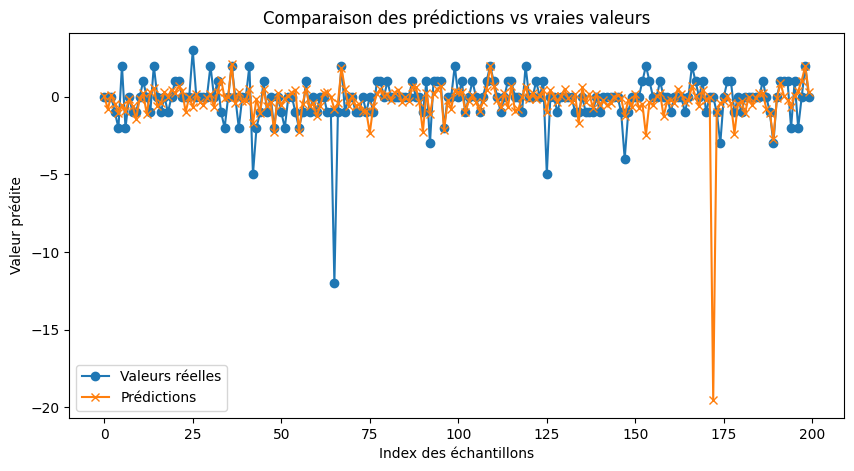

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:200], label="Valeurs réelles", marker='o')
plt.plot(predict_ridge[:200], label="Prédictions", marker='x')
plt.xlabel("Index des échantillons")
plt.ylabel("Valeur prédite")
plt.title("Comparaison des prédictions vs vraies valeurs")
plt.legend()
plt.show()

Le graphique montre que les prédictions du modèle Ridge suivent globalement les valeurs réelles, indiquant une bonne capacité de généralisation. Toutefois, on observe quelques écarts notables, notamment pour certaines valeurs extrêmes où le modèle sous-estime ou surestime fortement les retards. Ces écarts peuvent être dus à des variations inhabituelles dans les données, que le modèle a du mal à capturer. Malgré cela, la tendance générale est bien respectée, suggérant que le modèle est performant mais pourrait être amélioré pour mieux gérer les cas atypiques.

## LightGMB

In [ ]:
model_lgb = LGBMRegressor()

In [ ]:
model_lgb.fit(X_train, y_train)

predict_lgb = model_lgb.predict(X_test)

mea_lgb = mean_absolute_error(y_test, predict_lgb)
print(f"La MEA calculée est de : ", mea_lgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.155852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 496
[LightGBM] [Info] Number of data points in the train set: 533794, number of used features: 9
[LightGBM] [Info] Start training from score -0.161324
La MEA calculée est de :  0.7724133342533301


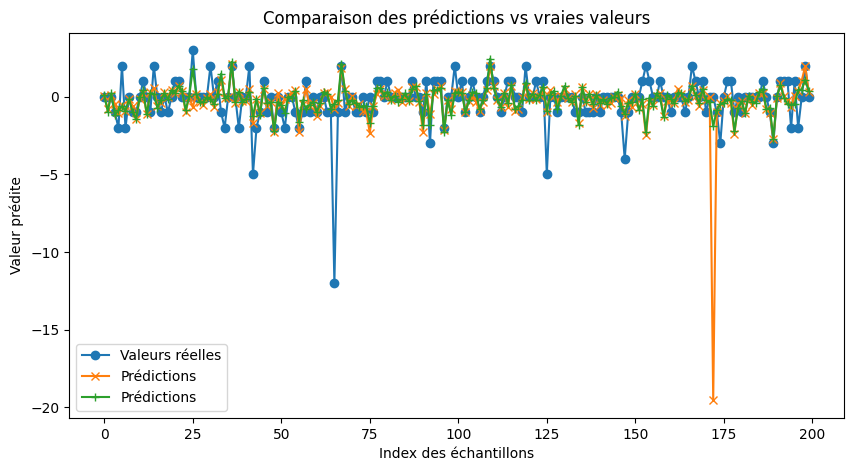

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:200], label="Valeurs réelles", marker='o')
plt.plot(predict_ridge[:200], label="Prédictions ridge", marker='x')
plt.plot(predict_lgb[:200], label="Prédictions lightgbm", marker='+')
plt.xlabel("Index des échantillons")
plt.ylabel("Valeur prédite")
plt.title("Comparaison des prédictions vs vraies valeurs")
plt.legend()
plt.show()

Le graphique compare les prédictions de deux modèles, Ridge (orange) et LightGBM (vert), aux valeurs réelles (bleu). Les deux modèles suivent globalement bien la tendance des valeurs réelles, mais on remarque que LightGBM (vert) semble légèrement plus précis que Ridge (orange).

LightGBM est un peu plus proche des valeurs réelles, avec une meilleure adaptation aux variations locales, tandis que Ridge présente quelques écarts plus marqués. Cela est particulièrement visible pour certains points où Ridge sous-estime fortement les valeurs, tandis que LightGBM reste plus aligné. Cependant, l’amélioration reste marginale et les deux modèles montrent des performances similaires sur la majorité des points.

## Random Forest

In [ ]:
model_randomforest = RandomForestRegressor()

In [ ]:
model_randomforest.fit(X_train, y_train)

predict_randomforest = model_randomforest.predict(X_test)

mea_randomforest = mean_absolute_error(y_test, predict_randomforest)
print(f"La MEA calculée est de : ", mea_randomforest)

La MEA calculée est de :  0.7977028187988313


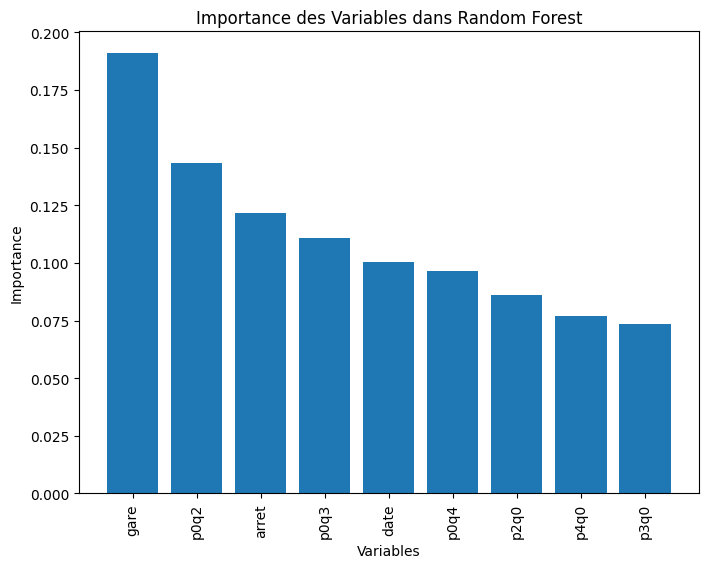

In [ ]:
importances = model_randomforest.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]  # Trier les importances

plt.figure(figsize=(8,6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.title("Importance des Variables dans Random Forest")
plt.show()

La feature ayant la plus grande importance dans le modèle est **la gare**. Cela est logique, car chaque gare peut avoir ses propres tendances de retard en fonction de plusieurs facteurs : **fréquence** des trains, **affluence** des passagers, **infrastructure**, **correspondances** et conditions locales (comme la météo ou les travaux). Certaines gares, notamment les grandes gares de correspondance, sont plus sujettes aux retards en raison du trafic ferroviaire intense et des enchaînements de trains. À l’inverse, les petites gares avec moins de trafic peuvent avoir des retards plus faibles et plus prévisibles.

## XGBoost

In [ ]:
#model_boost = XGBRegressor(colsample_bytree= 1, learning_rate= 0.2, max_depth= 6, n_estimators=600, subsample= 1.0, objective="reg:absoluteerror", random_state=1)

In [ ]:
#model_boost = XGBRegressor(colsample_bytree= 0.99224, learning_rate= 0.15, max_depth= 8, n_estimators=400, subsample= 1.0, objective="reg:absoluteerror", random_state=1)

In [ ]:
model_boost = XGBRegressor(random_state =1)

In [ ]:
model_boost.fit(X_train, y_train)

predict_boost = model_boost.predict(X_test)

mea_boost = mean_absolute_error(y_test, predict_boost)
print(f"La MEA calculée est de : ", mea_boost)

La MEA calculée est de :  0.7482087016105652


In [ ]:
y_pred = model_boost.predict(X_soumission)


predict = pd.DataFrame(y_pred, columns=["p0q0"])
predict.to_csv("y_predxboost_fiou", index=True, index_label="ID")

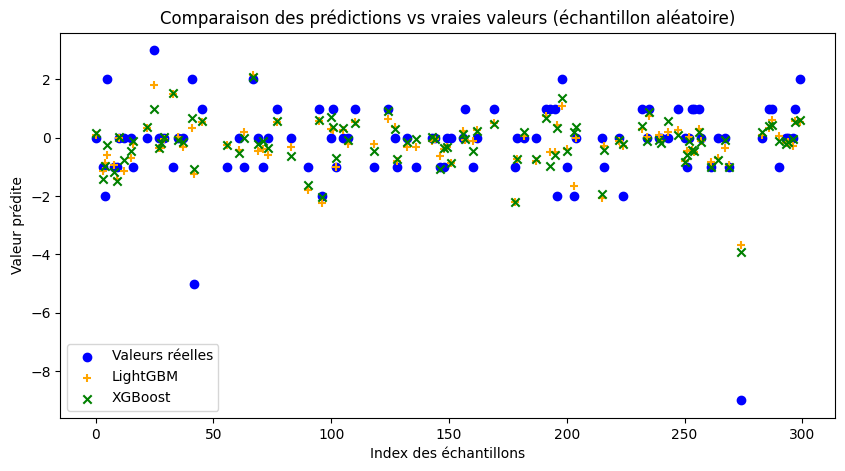

In [ ]:


# Sélection de 100 points aléatoires parmi les 300 premiers
indices = np.random.choice(300, 100, replace=False)  # 100 indices aléatoires sans répétition
indices.sort()  # Pour garder un ordre croissant et lisible

plt.figure(figsize=(10, 5))

# Courbe des vraies valeurs (points aléatoires uniquement)
plt.scatter(indices, y_test.values[indices], label="Valeurs réelles", marker='o', color='blue')

# Points pour LightGBM (points aléatoires uniquement)
plt.scatter(indices, predict_lgb[indices], label="LightGBM", marker='+', color='orange')

# Points pour XGBoost (points aléatoires uniquement)
plt.scatter(indices, predict_boost[indices], label="XGBoost", marker='x', color='green')

plt.xlabel("Index des échantillons")
plt.ylabel("Valeur prédite")
plt.title("Comparaison des prédictions vs vraies valeurs (échantillon aléatoire)")
plt.legend()
plt.show()


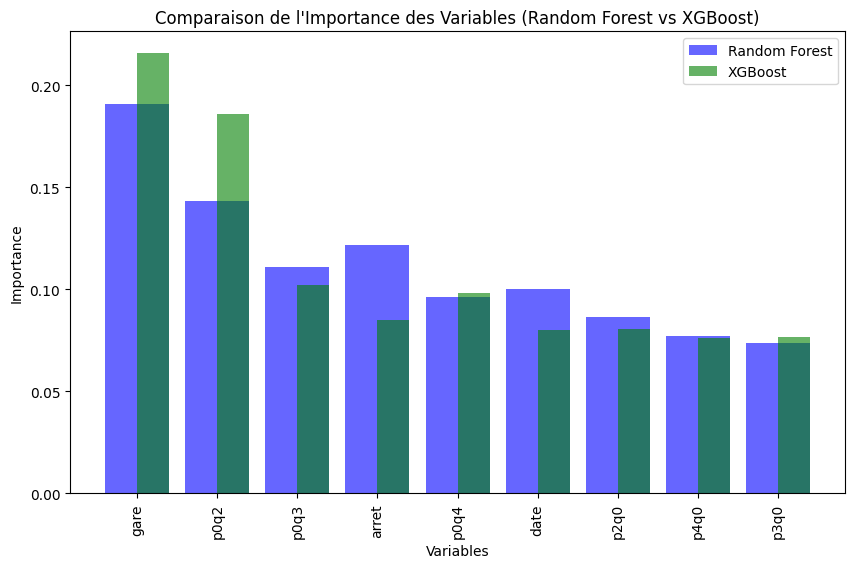

In [ ]:
# Récupérer l'importance des variables
importances_rf = model_randomforest.feature_importances_
importances_boost = model_boost.feature_importances_
features = X_train.columns

# Moyenne des importances pour garder le même ordre
importances_avg = (importances_rf + importances_boost) / 2

# Trier les indices en fonction de cette moyenne (pour garder un ordre cohérent)
indices = np.argsort(importances_avg)[::-1]

plt.figure(figsize=(10,6))

# Barres pour Random Forest (en bleu)
plt.bar(range(len(features)), importances_rf[indices], align="center", color='blue', alpha=0.6, label="Random Forest")

# Barres pour XGBoost (en vert, légèrement décalées)
plt.bar(range(len(features)), importances_boost[indices], align="edge", color='green', alpha=0.6, width=0.4, label="XGBoost")

# Labels des variables
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)

plt.xlabel("Variables")
plt.ylabel("Importance")
plt.title("Comparaison de l'Importance des Variables (Random Forest vs XGBoost)")
plt.legend()
plt.show()


## Choix du modèle

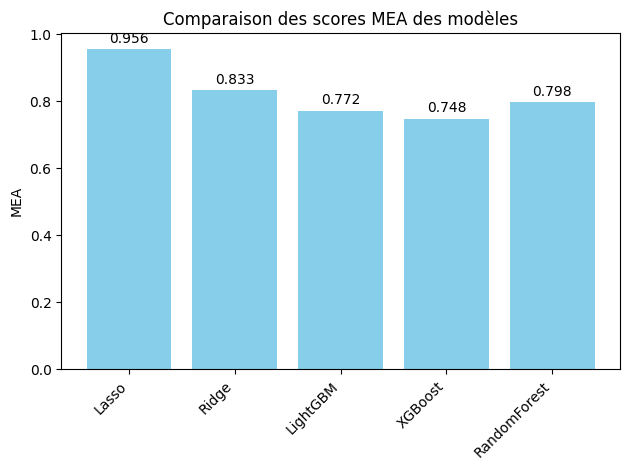

In [ ]:
# Stocker les scores MEA et les noms des modèles dans des listes
models = ['Lasso', 'Ridge', 'LightGBM', 'XGBoost','RandomForest']
mea_scores = [mea_lasso, mea_ridge, mea_lgb, mea_boost, mea_randomforest]

# Créer le graphique à barres
fig, ax = plt.subplots()
bars = ax.bar(models, mea_scores, color='skyblue')

# Ajouter les valeurs MEA au-dessus des barres
for bar, score in zip(bars, mea_scores):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
            round(score, 3), ha='center', va='bottom')

# Personnaliser le graphique
ax.set_ylabel('MEA')
ax.set_title('Comparaison des scores MEA des modèles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Afficher le graphique
plt.show()

Les meilleurs résultats obtenus par XGBoost dans la prédiction de retard par rapport à Ridge, Lasso, LightGBM et Random Forest peuvent être attribués à sa capacité à capturer des interactions complexes et non linéaires entre les variables. Contrairement aux modèles linéaires comme Ridge et Lasso, XGBoost, basé sur des arbres de décision et une approche de boosting, s'adapte mieux aux relations complexes présentes dans les données, ce qui lui permet d'offrir des prédictions plus précises pour des tâches impliquant des non-linéarités

# Recherche des hyperparamètres

Après plusieurs essais avec RandomSearchCV et GridSearchCV, nous avons choisi BayesSearchCV, couramment utilisé en compétition de machine learning. Son approche bayésienne permet d’explorer plus efficacement l’espace des hyperparamètres, réduisant le temps de calcul tout en améliorant les performances du modèle.

In [ ]:
# Définir le modèle
xgb = XGBRegressor()

# Définir l'espace des hyperparamètres
param_dist = {
    'n_estimators': [400, 500, 600,700],
    'learning_rate': [0.15, 0.2, 0.25],
    'max_depth': [6, 7, 8],
    'subsample': [ 0.9, 1.0],
    'colsample_bytree': [0.9, 1.0]
}

# Configurer RandomizedSearchCV
bayes_search = BayesSearchCV(
    estimator=xgb, search_spaces=param_dist,
    n_iter=50, cv=5, n_jobs=-1, verbose=2,
    scoring='neg_mean_absolute_error', random_state=42)

# Ajuster RandomizedSearchCV sur les données
bayes_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = bayes_search.best_params_
print("Meilleurs hyperparamètres trouvés :", best_params)

# Meilleur modèle
best_xgb = bayes_search.best_estimator_

# Prédire et évaluer
pred = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, pred)
print(mae)

rderedDict([('colsample_bytree', 0.9922475401679413), ('learning_rate', 0.15), ('max_depth', 8), ('n_estimators', 400), ('subsample', 1.0)])
0.7276240587234497

In [ ]:
model_boost = XGBRegressor(colsample_bytree= 0.99224, learning_rate= 0.15, max_depth= 8, n_estimators=400, subsample= 1.0, objective="reg:absoluteerror", random_state=1)

In [ ]:
model_boost.fit(X_train, y_train)

predict_boost_hyper = model_boost.predict(X_test)

mea_boost = mean_absolute_error(y_test, predict_boost_hyper)
print(f"La MEA calculée est de : ", mea_boost)

La MEA calculée est de :  0.6567820906639099


In [ ]:
y_pred = model_boost.predict(X_soumission)


predict = pd.DataFrame(y_pred, columns=["p0q0"])
predict.to_csv("y_predxboost_fiou", index=True, index_label="ID")

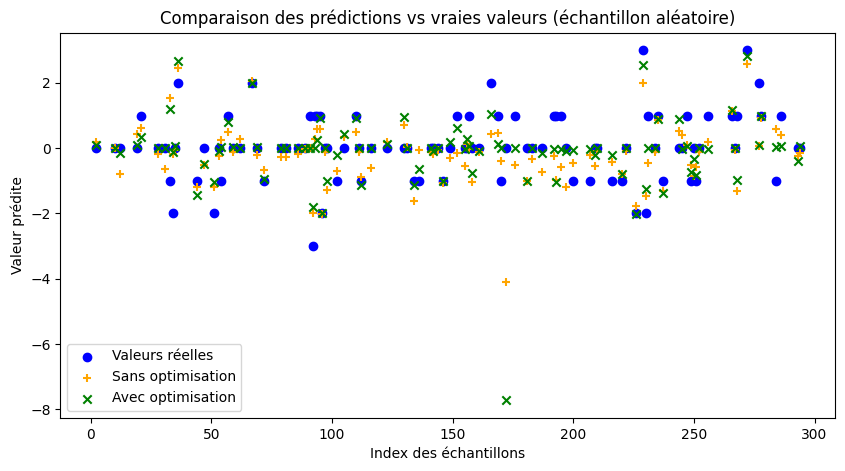

In [ ]:
# Sélection de 100 points aléatoires parmi les 300 premiers
indices = np.random.choice(300, 100, replace=False)  # 100 indices aléatoires sans répétition
indices.sort()  # Pour garder un ordre croissant et lisible

plt.figure(figsize=(10, 5))

# Courbe des vraies valeurs (points aléatoires uniquement)
plt.scatter(indices, y_test.values[indices], label="Valeurs réelles", marker='o', color='blue')

# Points pour LightGBM (points aléatoires uniquement)
plt.scatter(indices, predict_boost[indices], label="Sans optimisation", marker='+', color='orange')

# Points pour XGBoost (points aléatoires uniquement)
plt.scatter(indices, predict_boost_hyper[indices], label="Avec optimisation", marker='x', color='green')

plt.xlabel("Index des échantillons")
plt.ylabel("Valeur prédite")
plt.title("Comparaison des prédictions vs vraies valeurs (échantillon aléatoire)")
plt.legend()
plt.show()

On observe que les prédictions optimisées sont généralement plus proches des valeurs réelles que celles du modèle non optimisé, indiquant une amélioration grâce à l’ajustement des hyperparamètres. Cependant, certaines prédictions restent éloignées, montrant qu’il subsiste une marge d’amélioration.

# Tentatives d'amélioration

## Nouveau nettoyage des données

Pour rappel :

In [ ]:
count_values = (X0[colonnes] < -60).sum().sum()

# Nombre total de valeurs dans le DataFrame
total_values = X0[colonnes].size

# Ratio
ratio = count_values / total_values

print(f"Nombre de valeurs inférieures à -60 : {count_values}")
print(f"Nombre total de valeurs : {total_values}")
print(f"Ratio des valeurs inférieures à -60 : {ratio:.2%}")

Nombre de valeurs inférieures à -60 : 503
Nombre total de valeurs : 4003584
Ratio des valeurs inférieures à -60 : 0.01%


In [ ]:
X1 = X0.copy()
y1 = y0.copy()
X_soumission1=X_soumission0.copy()

In [ ]:
Q1 = X1[colonnes].quantile(0.25)
Q3 = X1[colonnes].quantile(0.75)
IQR = Q3 - Q1

# Détection des outliers
X1[colonnes] = X1[colonnes][~((X1[colonnes] < (Q1 - 3 * IQR)) | (X1[colonnes] > (Q3 + 3 * IQR))).any(axis=1)]

In [ ]:
y1 = y1.loc[X1.index]

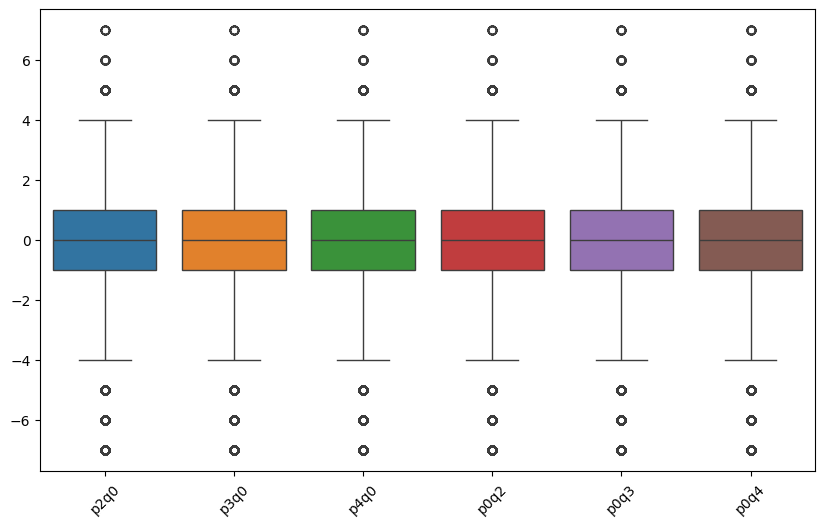

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=X1[['p2q0', 'p3q0', 'p4q0', 'p0q2', 'p0q3', 'p0q4']])
plt.xticks(rotation=45)
plt.show()

In [ ]:
X1.drop(['Unnamed: 0.1','Unnamed: 0','train'],axis=1, inplace = True)
X_soumission1.drop(['Unnamed: 0','train'],axis=1, inplace = True)
y1.drop(['Unnamed: 0'],axis=1, inplace = True)

In [ ]:
X1.head(5)

,gare,date,arret,p2q0,p3q0,p4q0,p0q2,p0q3,p0q4
0,KYF,2023-04-03,8,0.0,0.0,1.0,-3.0,-1.0,-2.0
1,JLR,2023-04-03,9,0.0,0.0,0.0,1.0,0.0,1.0
2,EOH,2023-04-03,10,-1.0,0.0,0.0,-1.0,0.0,0.0
3,VXY,2023-04-03,11,-1.0,-1.0,0.0,2.0,-2.0,0.0
4,OCB,2023-04-03,12,-1.0,-1.0,-1.0,-1.0,3.0,2.0


In [ ]:
if 'date' in X1.columns:
    X1['date'] = X1['date'].apply(
        lambda date_str: (
            datetime.datetime.strptime(str(date_str), '%Y-%m-%d')
            .date()
            .isoweekday() + 6
        ) % 7 + 1
    )

import datetime

if 'date' in X_soumission1.columns:
    X_soumission1['date'] = X_soumission1['date'].apply(
        lambda date_str: (
            datetime.datetime.strptime(str(date_str), '%Y-%m-%d')
            .date()
            .isoweekday() + 6
        ) % 7 + 1
    )

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X1,y1,test_size=0.2,random_state=1)

In [ ]:
encoder = TargetEncoder(cols=['gare'])

X_train['gare'] = encoder.fit_transform(X_train[['gare']],y_train['p0q0'])
X_test['gare'] = encoder.transform(X_test[['gare']])
X_soumission['gare'] = encoder.transform(X_soumission[['gare']])
X_soumission['gare'] = X_soumission['gare'].astype(float)

In [ ]:
model_boost =  XGBRegressor()

model_boost.fit(X_train, y_train)

predict_boost = model_boost.predict(X_test)

mea_boost = mean_absolute_error(y_test, predict_boost)
print(f"La MEA calculée est de : ", mea_boost)

La MEA calculée est de :  0.7490355968475342


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
# Définir le modèle
xgb = XGBRegressor()

# Définir l'espace des hyperparamètres
param_dist = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.1, 0.15, 0.2],
    'max_depth': [7, 8, 9],
    'subsample': [ 0.9, 1.0],
    'colsample_bytree': [0.9, 1.0]
}

# Configurer RandomizedSearchCV
bayes_search = BayesSearchCV(
    estimator=xgb, search_spaces=param_dist,
    n_iter=20, cv=3, n_jobs=-1, verbose=2,
    scoring='neg_mean_absolute_error', random_state=42)

# Ajuster RandomizedSearchCV sur les données
bayes_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = bayes_search.best_params_
print("Meilleurs hyperparamètres trouvés :", best_params)

# Meilleur modèle
best_xgb = bayes_search.best_estimator_

# Prédire et évaluer
pred = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, pred)
print(mae)

On remarque que la MEA ne change pas (par rapport au tout premier test sans la modificaion d'hyper paramètre), surement du au fait que les méthodes de boosting sont moins sensible à la gestion des outliers.

In [ ]:
model_boost =  XGBRegressor(colsample_bytree= 0.9183060201196227, learning_rate= 0.1, max_depth= 8, n_estimators=300, subsample= 1.0, objective="reg:absoluteerror", random_state=1)

model_boost.fit(X_train, y_train)

predict_boost = model_boost.predict(X_test)

mea_boost = mean_absolute_error(y_test, predict_boost)
print(f"La MEA calculée est de : ", mea_boost)

La MEA calculée est de :  0.670176088809967


Le score obtenu avec la gestion des outliers par IQR est inférieur à celui obtenu précédemment. Cela pourrait suggérer que la méthode IQR est trop radicale, en éliminant potentiellement des données qui, bien qu'elles semblent extrêmes, peuvent contenir des informations pertinentes. Cette approche pourrait donc entraîner une perte d'information précieuse, ce qui se traduit par une diminution de la précision du modèle

## Ajout de la météo

In [ ]:
X2 = X.copy()
y2 = y.copy()
X_soum2 = X_soumission.copy()

X2['day']=X2['date']
X_soum2['day']=X_soum2['date']

X2['date'] = X0['date']
X_soum2['date'] = X_soum2['date']

In [ ]:
def add_weather_data(df):
    # Vérifier que la colonne 'date' est bien en format datetime
    df['date'] = pd.to_datetime(df['date'])

    # Définir la localisation (Paris)
    paris = Point(48.8566, 2.3522)

    # Déterminer la plage de dates (min - max)
    start_date = df['date'].min()
    end_date = df['date'].max()

    # Récupérer les données météo pour toute la période en une seule requête
    weather_data = Daily(paris, start_date, end_date).fetch()

    # Garder uniquement les colonnes utiles
    weather_data = weather_data[['tavg', 'tmin', 'tmax','prcp']]

    # S'assurer que l'index est bien au format date
    weather_data.index = pd.to_datetime(weather_data.index)

    # Fusionner avec le DataFrame d'origine sur la date
    df = df.merge(weather_data, left_on='date', right_index=True, how='left')

    return df

In [ ]:
X2 = add_weather_data(X2)
X_soum2 = add_weather_data(X_soum2)

In [ ]:
X2.head(5)

,gare,date,arret,p2q0,p3q0,p4q0,p0q2,p0q3,p0q4,day,tavg,tmin,tmax,prcp
0,KYF,2023-04-03,8,0.0,0.0,1.0,-3.0,-1.0,-2.0,1,8.5,5.5,12.7,0.0
1,JLR,2023-04-03,9,0.0,0.0,0.0,1.0,0.0,1.0,1,8.5,5.5,12.7,0.0
2,EOH,2023-04-03,10,-1.0,0.0,0.0,-1.0,0.0,0.0,1,8.5,5.5,12.7,0.0
3,VXY,2023-04-03,11,-1.0,-1.0,0.0,2.0,-2.0,0.0,1,8.5,5.5,12.7,0.0
4,OCB,2023-04-03,12,-1.0,-1.0,-1.0,-1.0,3.0,2.0,1,8.5,5.5,12.7,0.0


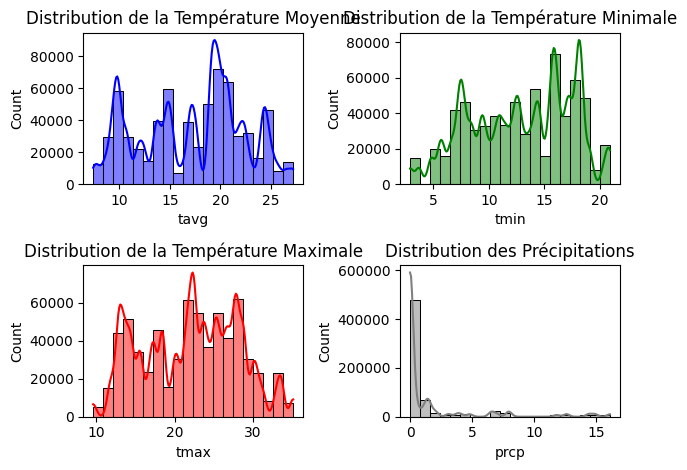

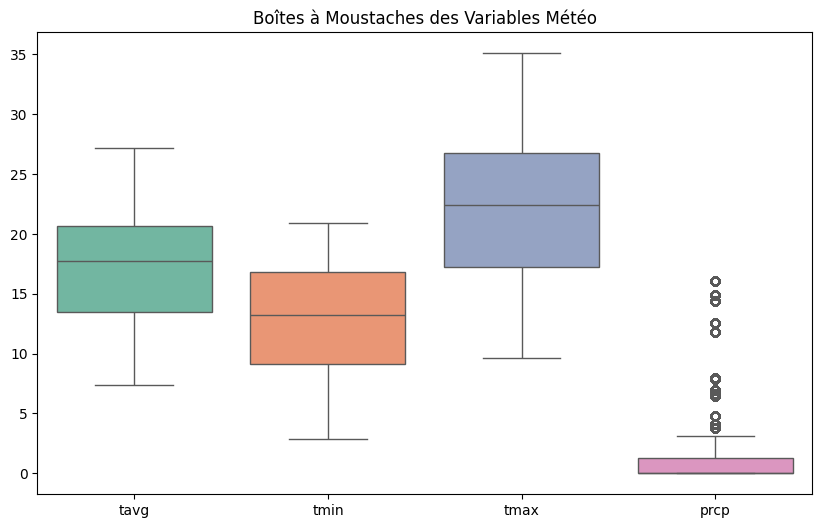

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogrammes des températures et précipitations
plt.subplot(2, 2, 1)
sns.histplot(X2['tavg'], bins=20, kde=True, color='blue')
plt.title("Distribution de la Température Moyenne")

plt.subplot(2, 2, 2)
sns.histplot(X2['tmin'], bins=20, kde=True, color='green')
plt.title("Distribution de la Température Minimale")

plt.subplot(2, 2, 3)
sns.histplot(X2['tmax'], bins=20, kde=True, color='red')
plt.title("Distribution de la Température Maximale")

plt.subplot(2, 2, 4)
sns.histplot(X2['prcp'], bins=20, kde=True, color='gray')
plt.title("Distribution des Précipitations")

plt.tight_layout()
plt.show()

# Boxplots pour voir la dispersion des valeurs
plt.figure(figsize=(10, 6))
sns.boxplot(data=X2[['tavg', 'tmin', 'tmax', 'prcp']], palette="Set2")
plt.title("Boîtes à Moustaches des Variables Météo")
plt.show()


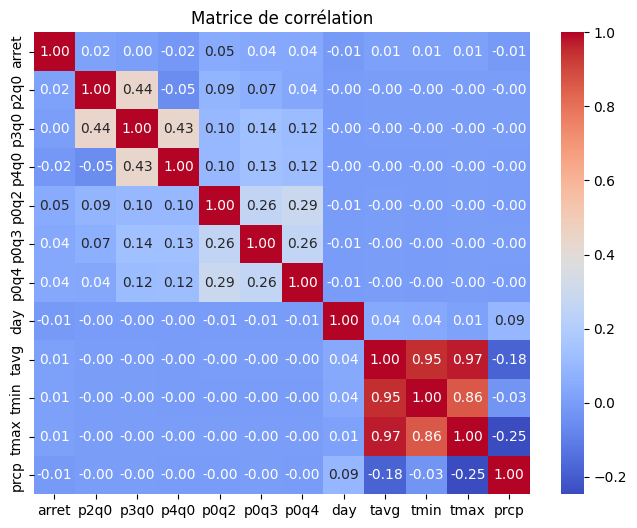

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(X2[['arret', 'p2q0', 'p3q0', 'p4q0', 'p0q2', 'p0q3', 'p0q4','day','tavg', 'tmin', 'tmax','prcp']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [ ]:
X2.drop('date',axis=1,inplace=True)
X_soum2.drop('date',axis=1,inplace=True)

In [ ]:
X2.drop(['tmin','tmax'],axis=1,inplace=True)
X_soum2.drop(['tmin','tmax'],axis=1,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=1)

encoder = TargetEncoder(cols=['gare'])

X_train['gare'] = encoder.fit_transform(X_train[['gare']],y_train['p0q0'])
X_test['gare'] = encoder.transform(X_test[['gare']])
X_soumission['gare'] = encoder.transform(X_soumission[['gare']])
X_soumission['gare'] = X_soumission['gare'].astype(float)

In [ ]:
model_boost =  XGBRegressor()

model_boost.fit(X_train, y_train)

predict_boost = model_boost.predict(X_test)

mea_boost = mean_absolute_error(y_test, predict_boost)
print(f"La MEA calculée est de : ", mea_boost)

La MEA calculée est de :  0.7482087016105652


L'ajout de ces variables n'améliore pas la précision du modèle. En effet, les variations sont probablement trop faibles, et les retards causés par des facteurs comme la pluie ou des températures élevées (qui peuvent entraîner des malaises, par exemple) ont un impact limité.

## Utilisation de sinus et cosinus pour la date

In [ ]:
X3 = X.copy()
y3 = y.copy()
X_soum3 = X_soumission.copy()

In [ ]:
X_soum3['day_sin'] = np.sin(2 * np.pi * X_soum3['date'] / 7)
X_soum3['day_cos'] = np.cos(2 * np.pi * X_soum3['date'] / 7)

X3['day_sin'] = np.sin(2 * np.pi * X3['date'] / 7)
X3['day_cos'] = np.cos(2 * np.pi * X3['date'] / 7)

X3.drop('date',axis=1,inplace=True)
X_soum3.drop('date',axis=1,inplace=True)

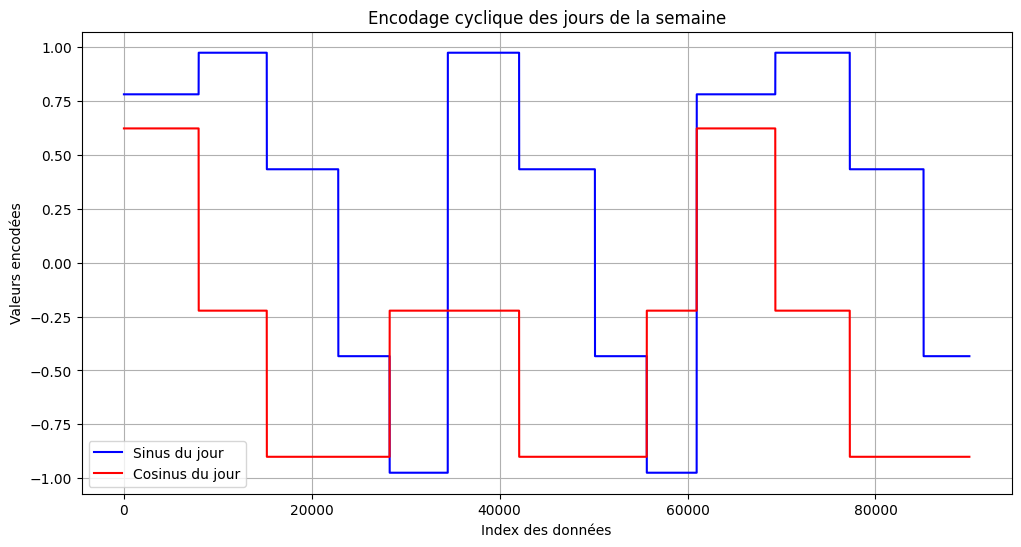

In [ ]:
# Sélectionner les 300 premières lignes
X3_sample = X3.iloc[:90000]

plt.figure(figsize=(12, 6))

# Tracer day_sin
plt.plot(X3_sample.index, X3_sample['day_sin'], label="Sinus du jour", color="blue")

# Tracer day_cos
plt.plot(X3_sample.index, X3_sample['day_cos'], label="Cosinus du jour", color="red")

# Ajouter des indications
plt.xlabel("Index des données")
plt.ylabel("Valeurs encodées")
plt.title("Encodage cyclique des jours de la semaine")
plt.legend()
plt.grid()

# Afficher le graphique
plt.show()

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X3,y3,test_size=0.2,random_state=1)

encoder = TargetEncoder(cols=['gare'])

X_train['gare'] = encoder.fit_transform(X_train[['gare']],y_train['p0q0'])
X_test['gare'] = encoder.transform(X_test[['gare']])
X_soumission['gare'] = encoder.transform(X_soumission[['gare']])
X_soumission['gare'] = X_soumission['gare'].astype(float)

In [ ]:
model_boost =  XGBRegressor()

model_boost.fit(X_train, y_train)

predict_boost = model_boost.predict(X_test)

mea_boost = mean_absolute_error(y_test, predict_boost)
print(f"La MEA calculée est de : ", mea_boost)

La MEA calculée est de :  0.7471134066581726


La MEA est amélioré, utilisons les hyperparamètres.

In [ ]:
X_soum3.head()

,gare,arret,p2q0,p3q0,p4q0,p0q2,p0q3,p0q4,day_sin,day_cos
0,-0.161324,12,0.0,0.0,-2.0,-4.0,-2.0,-4.0,0.781831,0.62349
1,-0.161324,12,0.0,0.0,-1.0,1.0,-1.0,0.0,0.781831,0.62349
2,-0.161324,12,0.0,1.0,-1.0,1.0,-1.0,1.0,0.781831,0.62349
3,-0.161324,12,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.781831,0.62349
4,-0.161324,12,1.0,-2.0,0.0,0.0,0.0,0.0,0.781831,0.62349


In [ ]:
model_boost =  XGBRegressor(colsample_bytree= 0.99224, learning_rate= 0.15, max_depth= 8, n_estimators=400, subsample= 1.0, objective="reg:absoluteerror", random_state=1)

model_boost.fit(X_train, y_train)

predict_boost = model_boost.predict(X_test)

mea_boost = mean_absolute_error(y_test, predict_boost)
print(f"La MEA calculée est de : ", mea_boost)

La MEA calculée est de :  0.6551880836486816


L’encodage des dates en sinus et cosinus a permis d’améliorer les performances sur les données d’entraînement et de test, mais n’a pas conduit à une réduction significative de l’erreur moyenne absolue (MEA) lors de la soumission. Cela peut s’expliquer par une sensibilité accrue du modèle aux variations temporelles présentes dans l’ensemble d’entraînement, entraînant une moins bonne généralisation aux nouvelles données. De plus, si la distribution des dates dans les données de soumission diffère légèrement, l’impact de cette transformation peut être limité. Enfin, d’autres facteurs non liés à la cyclicité temporelle peuvent influencer les prédictions, réduisant ainsi les bénéfices de cet encodage.